In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from collective_variable import CECCollectiveVariable
from analysis import WaterAnalysis, CVAnalysis
from residue_analysis import ResidueAnalysis
from plotting import CVPlotting
import MDAnalysis as mda

In [2]:
# Directory and title
dir1 = '/biggin/b222/catz0163/pept/dynamics/pept_holo/pept_AF_H87P_D342P_v2/qmmm'
title1 = 'PepT2 with AF H87P D342P'

# Load the universe
u1 = mda.Universe(f'{dir1}/prod-s100.pdb', f'{dir1}/prod-s100.xtc')

In [3]:
frame_test = 166

# Initialise class
cv = CECCollectiveVariable(u1, initial_resid=87, target_resid=56,
                            other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 342],
                            ligand=[1, 2], cyzone_dim=[9, 8, -8],
                            frame_n=frame_test)

#cv.cv_selection_string
cv.get_sele_info()
cv.write_cv_and_qm(frame_n=frame_test)


--- RESIDS ---

Number of atoms: 78
Number of residues: 13
Residue names: LYS, ASH, GLU, THR, TYR, GLN, PHE, HIP, ARG, ALA
Atom names: NE2, NH1, NE, C, O, CE2, OC2, OD1, CD2, CZ, NZ, OE2, CG, CB, CD, OC1, OG1, CA, CE, CE1, OH, CD1, CG2, ND1, NH2, OE1, N, OD2

--- QM ATOMS ---

Number of QM atoms: 107
Number of QM residues: 35
Residue names: HIP, SOL, GLU
Atom names: HE2, NE2, HD2, OW, ND1, HD1, HE1, HW2, OE1, HW1, OE2

--- WATERS ---

Number of water atoms: 99
Number of water residues: 33
Residue names: SOL
Atom names: HW1, HW2, OW




/biggin/b222/catz0163/miniconda3/envs/md/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/biggin/b222/catz0163/miniconda3/envs/md/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1200: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


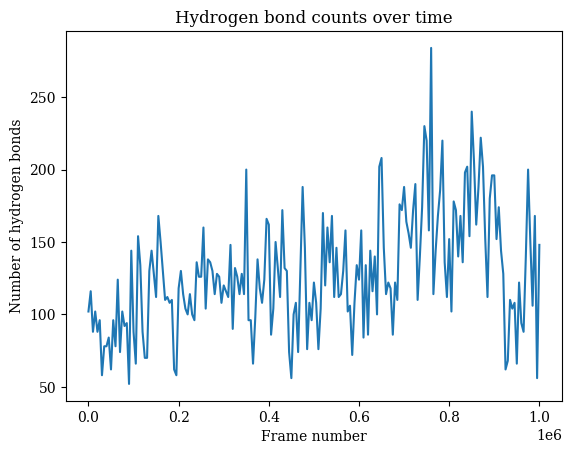

In [17]:
# Water analysis - Hydrogen bonds
wa = WaterAnalysis(u1, initial_resid=342, target_resid=56,
                    other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 87],
                    ligand=[1, 2], cyzone_dim=[8, 8, -8],
                    frame_n=160)

counts = wa.get_water_h_bonds()

wa.plot_hbond_counts(counts, save=True)

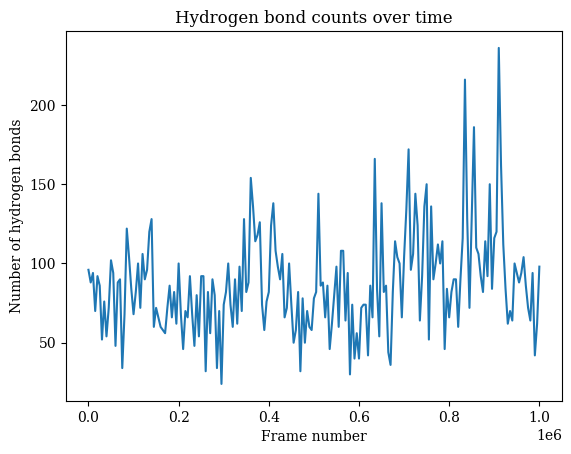

In [4]:
# Water analysis - Hydrogen bonds
wa = WaterAnalysis(u1, initial_resid=87, target_resid=56,
                    other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 342],
                    ligand=[1, 2], cyzone_dim=[8, 8, -8],
                    frame_n=160)

counts = wa.get_water_h_bonds()

wa.plot_hbond_counts(counts, save=True)

In [5]:
wa.get_max_hbond_counts(counts)


Max counts: [236, 216, 186, 172, 166, 162, 154, 150, 150, 144]

Frames with the most hydrogen bonds: [182, 167, 171, 142, 127, 183, 72, 150, 150, 102]
Times of the frames with the most hydrogen bonds: [910000.0, 835000.0, 855000.0, 710000.0, 635000.0, 915000.0, 360000.0, 750000.0, 750000.0, 510000.0]


([182, 167, 171, 142, 127, 183, 72, 150, 150, 102],
 [910000.0,
  835000.0,
  855000.0,
  710000.0,
  635000.0,
  915000.0,
  360000.0,
  750000.0,
  750000.0,
  510000.0])